<a href="https://colab.research.google.com/github/taxuyou/library-recommend-and-timeseries-predict/blob/master/ARIMA%EB%B6%84%EC%84%9D%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
from datetime import datetime

In [0]:
lib = pd.read_csv('세종_날씨_방문자.csv',index_col="date",parse_dates=True)

In [0]:
lib.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 839 entries, 2017-01-01 to 2019-07-29
Data columns (total 13 columns):
visitors               839 non-null int64
Average_temperature    839 non-null float64
Minimum_Temperature    839 non-null float64
Maximum_Temperature    839 non-null float64
Daily_precipitation    839 non-null float64
Average_wind_speed     839 non-null float64
days                   839 non-null object
holiday                839 non-null int64
workingday             839 non-null int64
season                 839 non-null int64
year                   839 non-null int64
month                  839 non-null int64
day                    839 non-null int64
dtypes: float64(5), int64(7), object(1)
memory usage: 91.8+ KB


In [0]:
from statsmodels.tsa.stattools import adfuller
def adf_check(ts):
  result = adfuller(ts)
  if result[1] <= 0.05:
    print('Stationary {}'.format(result[1]))
  else:
    print('Non Stationary {}'.format(result[1]))

In [0]:
adf_check(lib['visitors'])

Stationary 0.0001307432142277134


In [0]:
# lib.set_index('date', inplace=True)

In [0]:
# lib['visitors'].resample('D').mean()

In [0]:
from statsmodels.tsa.arima_model import ARIMA

In [0]:
p = list(range(0,16))
d = [1,2]
q = [0]

In [0]:
import itertools

In [0]:
pdq = list(itertools.product(p, d, q))

In [0]:
pdq

[(0, 1, 0),
 (0, 2, 0),
 (1, 1, 0),
 (1, 2, 0),
 (2, 1, 0),
 (2, 2, 0),
 (3, 1, 0),
 (3, 2, 0),
 (4, 1, 0),
 (4, 2, 0),
 (5, 1, 0),
 (5, 2, 0),
 (6, 1, 0),
 (6, 2, 0),
 (7, 1, 0),
 (7, 2, 0),
 (8, 1, 0),
 (8, 2, 0),
 (9, 1, 0),
 (9, 2, 0),
 (10, 1, 0),
 (10, 2, 0),
 (11, 1, 0),
 (11, 2, 0),
 (12, 1, 0),
 (12, 2, 0),
 (13, 1, 0),
 (13, 2, 0),
 (14, 1, 0),
 (14, 2, 0),
 (15, 1, 0),
 (15, 2, 0)]

In [0]:
for param in pdq:
  model = ARIMA(lib['visitors'], order = param)
  result = model.fit()
  print('ARIMA{} - AIC{}'.format(param, result.aic))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

ARIMA(0, 1, 0) - AIC13956.3732061363
ARIMA(0, 2, 0) - AIC14611.88889277309
ARIMA(1, 1, 0) - AIC13947.014381287934
ARIMA(1, 2, 0) - AIC14480.931411265643
ARIMA(2, 1, 0) - AIC13807.735883861495


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(2, 2, 0) - AIC14262.11620778615
ARIMA(3, 1, 0) - AIC13781.457327718328


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

ARIMA(3, 2, 0) - AIC14216.434550708076
ARIMA(4, 1, 0) - AIC13649.297397670105


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(4, 2, 0) - AIC14159.622914112648


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(5, 1, 0) - AIC13426.885068014677


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(5, 2, 0) - AIC13940.504399328116


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(6, 1, 0) - AIC13366.075874977725


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(6, 2, 0) - AIC13713.764242216921


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(7, 1, 0) - AIC13366.88232932167


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(7, 2, 0) - AIC13626.583172151924


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(8, 1, 0) - AIC13366.606433343757


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(8, 2, 0) - AIC13548.801064546773


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(9, 1, 0) - AIC13367.847461381654


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(9, 2, 0) - AIC13489.375098478737


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(10, 1, 0) - AIC13365.309381099007


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(10, 2, 0) - AIC13489.803630972481


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(11, 1, 0) - AIC13321.79649595252


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(11, 2, 0) - AIC13490.748932742516


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(12, 1, 0) - AIC13251.402681675887


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWa

ARIMA(12, 2, 0) - AIC13340.654389496845
ARIMA(13, 1, 0) - AIC13221.002880627851


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(13, 2, 0) - AIC13326.335959162767


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(14, 1, 0) - AIC13222.912701363886


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


KeyboardInterrupt: ignored

In [0]:
###   p = 13, d = 1 , q =0

In [0]:
X = lib['visitors'].values

In [0]:
# X

In [0]:
size = int(len(X) * 0.97)

In [0]:
train, test = X[:size], X[size:]

In [0]:
len(train)

813

In [0]:
len(test)

26

In [0]:
# 시점을 옮겨갈수록 뒤에서 데이터 한개씩 추가해줘야 되기떄문에 히스토리 하나 만들어줌
history = [x for x in train]

In [0]:
# 예측 결과값 넣을 곳
prediction = []

In [0]:
len(prediction)

0

In [0]:
#!pip install tqdm
from tqdm import tqdm
from sklearn.metrics import mean_squared_error

In [0]:
# t 시점은 테스트 사이즈만큼 돌림. 돌려서 실제 결과랑 테스트 비교하기 위해
for t in tqdm(range(len(test)), desc = '진행상황'):
  #트레인데이터로 모델 만들기
  model = ARIMA(history, order = (13, 1, 0))
  result = model.fit(disp = 0)
  # 결과에 대해 예측하기
  output = result.forecast()
  #아웃풋은 첫번째 값이 예측값
  yhat = output[0]
  prediction.append(yhat)
  obs = test[t]
  history.append(obs)
  print('predicted=%f, expected=%f' % (yhat, obs))

error = mean_squared_error(test, prediction)
print('Test MSE: %.3f' % error)

진행상황:   4%|▍         | 1/26 [00:19<08:13, 19.76s/it]

predicted=1721.912190, expected=2055.000000


진행상황:   8%|▊         | 2/26 [00:42<08:15, 20.66s/it]

predicted=2151.852887, expected=1943.000000


진행상황:  12%|█▏        | 3/26 [01:03<07:54, 20.64s/it]

predicted=1763.158713, expected=1863.000000


진행상황:  15%|█▌        | 4/26 [01:23<07:35, 20.68s/it]

predicted=2180.976748, expected=1721.000000


진행상황:  19%|█▉        | 5/26 [01:44<07:16, 20.79s/it]

predicted=3050.620911, expected=2735.000000


진행상황:  23%|██▎       | 6/26 [02:06<06:57, 20.88s/it]

predicted=3110.697381, expected=3572.000000


진행상황:  27%|██▋       | 7/26 [02:27<06:39, 21.02s/it]

predicted=2039.189303, expected=2285.000000


진행상황:  31%|███       | 8/26 [02:47<06:13, 20.72s/it]

predicted=1798.118670, expected=1800.000000


진행상황:  35%|███▍      | 9/26 [03:09<05:56, 21.00s/it]

predicted=1880.994820, expected=1865.000000


진행상황:  38%|███▊      | 10/26 [03:29<05:31, 20.69s/it]

predicted=1992.975639, expected=1924.000000


진행상황:  42%|████▏     | 11/26 [03:48<05:04, 20.33s/it]

predicted=2650.771192, expected=3205.000000


진행상황:  46%|████▌     | 12/26 [04:09<04:48, 20.59s/it]

predicted=3275.107988, expected=4036.000000


진행상황:  50%|█████     | 13/26 [04:29<04:22, 20.22s/it]

predicted=2470.691705, expected=1053.000000


진행상황:  54%|█████▍    | 14/26 [04:53<04:17, 21.44s/it]

predicted=1535.305052, expected=2144.000000


진행상황:  58%|█████▊    | 15/26 [05:13<03:52, 21.13s/it]

predicted=2401.252895, expected=2099.000000


진행상황:  62%|██████▏   | 16/26 [05:35<03:32, 21.20s/it]

predicted=1880.429863, expected=1991.000000


진행상황:  65%|██████▌   | 17/26 [05:58<03:15, 21.77s/it]

predicted=2246.565734, expected=2100.000000


진행상황:  69%|██████▉   | 18/26 [06:20<02:55, 21.91s/it]

predicted=3057.841393, expected=2812.000000


진행상황:  73%|███████▎  | 19/26 [06:42<02:32, 21.85s/it]

predicted=2969.130445, expected=4123.000000


진행상황:  77%|███████▋  | 20/26 [07:04<02:11, 21.95s/it]

predicted=2359.347484, expected=3700.000000


진행상황:  81%|████████  | 21/26 [07:27<01:51, 22.31s/it]

predicted=2228.867685, expected=3152.000000


진행상황:  85%|████████▍ | 22/26 [07:48<01:28, 22.01s/it]

predicted=2275.627939, expected=2457.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
진행상황:  88%|████████▊ | 23/26 [08:21<01:15, 25.24s/it]

predicted=2148.326028, expected=2873.000000


진행상황:  92%|█████████▏| 24/26 [08:42<00:48, 24.01s/it]

predicted=3332.914332, expected=3647.000000


진행상황:  96%|█████████▌| 25/26 [09:03<00:22, 22.98s/it]

predicted=3579.585003, expected=3909.000000


진행상황: 100%|██████████| 26/26 [09:25<00:00, 22.69s/it]

predicted=2632.237509, expected=2564.000000
Test MSE: 344490.926


In [0]:
error = mean_squared_error(test, prediction)
error

20664.167573776693

In [0]:
# 모델 정확성
import numpy as np
rmse = np.sqrt(error)
print('Test RMSE: %.3f' % rmse)

Test RMSE: 143.750


In [0]:
lib['visitors'].describe()

count     839.000000
mean     2451.293206
std       922.629056
min       345.000000
25%      1721.500000
50%      2100.000000
75%      3154.500000
max      7268.000000
Name: visitors, dtype: float64

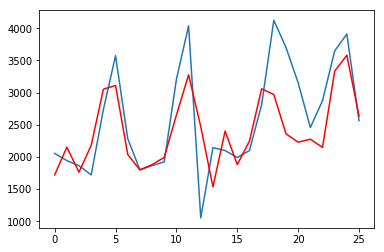

In [0]:
plt.plot(test)
plt.plot(prediction, color = 'red')

In [0]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [0]:
error1 = mean_absolute_percentage_error(test, prediction)
print("MAPE :",error1,"%")

MAPE : 32.35530697490775 %


In [0]:
prediction

[array([1721.91219003]),
 array([2151.85288736]),
 array([1763.15871269]),
 array([2180.97674797]),
 array([3050.62091096]),
 array([3110.69738133]),
 array([2039.18930308]),
 array([1798.11867002]),
 array([1880.99482028]),
 array([1992.97563903]),
 array([2650.77119239]),
 array([3275.10798831]),
 array([2470.69170513]),
 array([1535.3050519]),
 array([2401.25289453]),
 array([1880.42986315]),
 array([2246.56573353]),
 array([3057.84139325]),
 array([2969.13044522]),
 array([2359.34748369]),
 array([2228.86768477]),
 array([2275.62793869]),
 array([2148.32602792]),
 array([3332.91433239]),
 array([3579.58500267]),
 array([2632.23750892])]

In [0]:
test

array([2055, 1943, 1863, 1721, 2735, 3572, 2285, 1800, 1865, 1924, 3205,
       4036, 1053, 2144, 2099, 1991, 2100, 2812, 4123, 3700, 3152, 2457,
       2873, 3647, 3909, 2564])

In [0]:
# prediction = np.reshape(prediction, 185,1)

In [0]:
# # 코사인 유사도
# from numpy import dot
# from numpy.linalg import norm
# cos_sim = dot(prediction, test)/(norm(prediction)*norm(test))

In [0]:
# print("코사인 유사도:",cos_sim *100,"%")